In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score, mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/experiment.csv')
df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.000000,0.013423,0.006711,0.000000,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.000000,0.006711,0.000000,1
1,0.000000,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.000000,0.007246,0.000000,1
2,0.011696,0.000000,0.005848,0.000000,0.000000,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.000000,0.000000,0.010526,0.000000,0.005263,0.000000,0.005263,0.010526,0.031579,0.005263,...,0.005263,0.005263,0.000000,0.005263,0.005263,0.021053,0.026316,0.010526,0.000000,1
6,0.000000,0.000000,0.009852,0.019704,0.000000,0.000000,0.000000,0.004926,0.009852,0.009852,...,0.019704,0.004926,0.009852,0.004926,0.000000,0.009852,0.009852,0.000000,0.004926,1
7,0.006135,0.006135,0.012270,0.006135,0.000000,0.000000,0.006135,0.012270,0.036810,0.006135,...,0.006135,0.000000,0.000000,0.018405,0.024540,0.000000,0.000000,0.012270,0.000000,1
8,0.000000,0.000000,0.016304,0.010870,0.010870,0.000000,0.000000,0.010870,0.000000,0.000000,...,0.016304,0.000000,0.000000,0.000000,0.000000,0.032609,0.000000,0.000000,0.000000,1
9,0.000000,0.000000,0.005814,0.005814,0.000000,0.005814,0.000000,0.011628,0.034884,0.005814,...,0.011628,0.000000,0.000000,0.011628,0.017442,0.011628,0.005814,0.000000,0.000000,1


In [5]:
df.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F197     0
F198     0
F199     0
F200     0
Class    0
Length: 201, dtype: int64

In [6]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.007245,0.005094,0.003749,0.004814,0.004394,0.004664,0.004318,0.009327,0.004394,0.003458,...,0.004131,0.003731,0.004545,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,3.000000
std,0.012460,0.008867,0.008527,0.008642,0.008072,0.009278,0.007984,0.013402,0.009775,0.007367,...,0.009224,0.007468,0.008130,0.009218,0.008929,0.007681,0.007581,0.007857,0.008777,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.012500,0.009901,0.000000,0.009009,0.008282,0.007874,0.008000,0.016393,0.000000,0.000000,...,0.006944,0.000000,0.008621,0.008942,0.007143,0.005723,0.006499,0.006909,0.005579,4.000000
max,0.136364,0.076923,0.150000,0.100000,0.058824,0.103448,0.071429,0.094595,0.136364,0.142857,...,0.250000,0.071429,0.064516,0.120000,0.058824,0.125000,0.075000,0.050000,0.064103,5.000000


A. visualize data

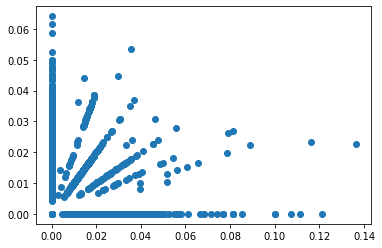

In [7]:
#plt.figure(figsize=(30, 15))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#ax = df.plot(kind='line')
#ax.legend(ax.get_lines(), df.columns, loc='best')
plt.scatter(df['F1'], df['F200'])
plt.show()

Dapat dilihat ada beberapa data yang outlier. Contohnya yang paling terlihat ada pada titik yang paling ujung kanan.

B. preprocess

Data tersebut berbentuk linear sehingga memungkinkan untuk menggunakan linear regression. Data perlu normalisasi karena data paling besar itu nilainya tidak sampai dengan 1, melainkan hanya 0.6

In [8]:
#normalisasi cara 1
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, shuffle= True, random_state= 0)

x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [9]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set
print(normalized_x_test)
print(normalized_x_train)

[[0.         0.         0.09853293 ... 0.09853293 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.08304548]
 ...
 [0.         0.         0.10976426 ... 0.03658809 0.         0.        ]
 [0.         0.12403473 0.12403473 ... 0.         0.         0.        ]
 [0.         0.21199958 0.         ... 0.         0.10599979 0.10599979]]
[[0.         0.07808688 0.         ... 0.         0.         0.07808688]
 [0.11250879 0.         0.         ... 0.11250879 0.         0.22501757]
 [0.08980265 0.08980265 0.         ... 0.         0.         0.        ]
 ...
 [0.13867505 0.06933752 0.         ... 0.         0.         0.        ]
 [0.07392213 0.         0.         ... 0.         0.         0.        ]
 [0.         0.13639887 0.         ... 0.         0.         0.06819943]]


In [ ]:
#normalisasi cara 2
#from sklearn import preprocessing
#normalized_df = preprocessing.normalize(df)
#print(normalized_df)

Menurut saya tidak diperlukan adanya selection/dimensional reduction karena data yang diberikan sudah dalam bentuk 2 dimensi sehingga tidak perlu direduce lagi.

Selain itu tidak juga diperlukannya outlier dalam kasus ini karena menurut analisa saya outlier tidak terlalu berpengaruh dan dilihat dari data outliernya sedikit.

C. 2 metode machine learning 

1. Multivariate linear regression

In [10]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_train, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_train - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_train, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_train - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_train):
    return np.sum((y - y_train)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_train = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_train, alpha)
      self.intercept = self.update_intercept(y, y_train, alpha)
      loss.append(self.get_MSE(y, y_train))

    return loss

In [11]:
all_loss = []

for alpha in [0.1, 0.2, 0.3]:
  model = gradient_descent(x_train.shape[1])
  epochs = 250
  loss = model.fit(x_train, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

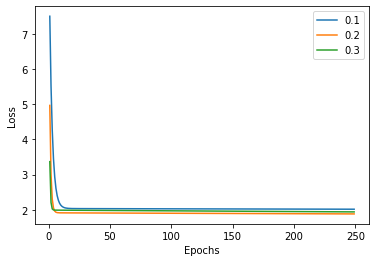

In [12]:
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
model = gradient_descent(x.shape[1])
epochs = 100
_=model.fit(x_train, y_train, epochs,0.2)

In [14]:
w = model.theta
b = model.intercept

In [ ]:
MSE = mean_squared_error(y_test, y_train)
print ("MSE :", MSE)

RMSE = mean_squared_error(y_test, y_train, squared = False)
print ("RMSE :", RMSE)

score = r2_score(y_test, y_train)
print ("R2 :", score)

Sesuai dengan namanya yaitu linear dan sesuai dengan data yang diberikan pada soal berupa data linear.

Alasan mengapa menggunakan linear regression ialah linear regression melakukan tugas untuk memprediksi nilai variabel dependen (y) berdasarkan variabel independen yang diberikan (x). Dan Saya merasa hal ini cocok dengan data yang diberikan.

2. K-Nearest Neighbors

In [15]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_regression(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    y_values = y_train[top_k]
    pred.append(np.mean(y_values))

  return pred

Elbow method for tuning KNN for optimal K

In [16]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

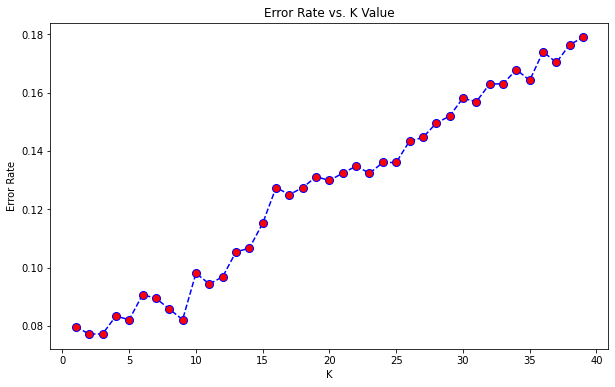

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Random choose k=3 
optimum_k = 3

y_pred = knn_regression(x_train, y_train, x_test, optimum_k)
acc = accuracy_score(y_test, np.array(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Accuracy score: {acc}')
print(f'RMSE: {rmse}')

In [ ]:
print(classification_report(y_test, y_pred))

Kenapa untuk yang kedua saya pilih KNN? 

K-nearest neighbors (k-NN) adalah pattern recognition algorithm yang menggunakan training datasets untuk mencari the k closest relatives pada contoh selanjutnya.

Ketika KNN digunakan dalam classification, kita dapat menghitung penempatan data dalam kategori nearest neighbor. Jika k = 1, maka akan ditempatkan pada class yang terdekat dengan 1. K diklasifikasikan berdasarkan plurality poll dari neigbors.

Sejalan dengan pemahaman terhadap k-NN, data yang diberikan dapat diklasifikasikan bersadarkan kedekatan classnya.

4. Evaluate and comparison




Disini saya menggunakan metric comparison berupa RMSE dan MSE.

Baik RMSE dan MSE memberikan  measure berupa seberapa jauh prediksi tersebut dari actual output yang ada.

